<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Hanz Karim Peña Hernandez y Enrique Jair Rodriguez Orozco.

**Fecha:** 10 de Marzo del 2023.

**Expediente** : 727232 y 727454.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: 

# Tarea 4: Clase 9 y 10

## Código de solución estudiante 1

In [1]:
# Importamos librerías a trabajar en todas las simulaciones
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle  # Librería para hacer ciclos
import scipy.stats as st     # Librería estadística
from math import factorial as fac # Importo la operación factorial
%matplotlib inline

>### <font color ='red'> **Tarea 4: Ejercicio 1** 
    
> Para las siguiente dos funciones, genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique el histograma de 1000 muestras generadas con el método de la transformada inversa y compárela con el función $f(x)$ **(recuerde que $f(x)$ es la distribución de probabilidad y $F(x)$ es la distribución de probabilidad acumulada)** [ver este enlace para más información](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_distribuci%C3%B3n). Este procedimiento se realiza con el fín de validar que el procedimiento y los resultados son correctos.
    
> 1. Generación variable aleatoria continua
>El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>

Despejamos :
$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x)$$

$$\frac{2}{\pi}\sin^{-1}(\sqrt x)=U$$

$$\sqrt x=\sin(\frac{\pi}{2}U)$$

$$x=\sin^2(\frac{\pi}{2}U)$$

$$f(x)=\frac{1}{\pi\sqrt{x}\sqrt{1-x}}$$

In [2]:
# Creamos función
def Fx(N):
    return (np.sin((np.pi/2)*np.random.random(N)))**2

f = lambda x: 1/(np.pi*np.sqrt(x)*np.sqrt(1-x))

/var/folders/sd/h4vwx3xs0555rb9r9gst07fw0000gn/T/ipykernel_40091/2775956393.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  f = lambda x: 1/(np.pi*np.sqrt(x)*np.sqrt(1-x))


0.5017351630445888


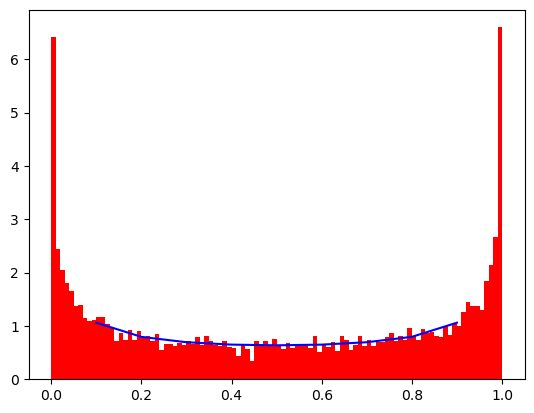

In [3]:
# Simulamos para N veces
N = 10000
x_sim = Fx(N)
x = np.arange(0, 1.1, 0.1)
plt.plot(x, [f(n) for n in x], color='blue')
plt.hist(x_sim,bins = 100,density=True,color='red')
print(np.mean(x_sim))
plt.show()

>### <font color ='red'> **Tarea 4: Ejercicio 2** 
    
> 2. Generación variable aleatoria Discreta
> La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.
> Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que $$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> Por propiedades de la operación factorial la anterior $p_i$ se puede escribir como:
> $$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

> **Nota:** Por notación recuerde que para el caso continuo $f(x)$ es la distribución de probabilidad (PDF), mientras $F(x)$ corresponde a la distribución de probabilidad acumulada (CDF). Para el caso discreto, $P(X=i)$ corresponde a su distribución de probabilidad (PMF) y $ F_{X}(x)=\operatorname {P} (X\leq x)=\sum _{x_{i}\leq x}\operatorname {P} (X=x_{i})=\sum _{x_{i}\leq x}p(x_{i})$, corresponde a su distribución de probabilidad acumulada (CDF).


In [4]:
### Ejercicio resuelto en clase
## Distribución binomial
def Gen_distr_discreta(p_acum: 'P.Acumulada de la distribución a generar',
                       indices: 'valores reales a generar aleatoriamente',
                       N: 'cantidad de números aleatorios a generar'):
    
    U =np.random.rand(N)
    # Diccionario de valores aleatorios
    rand2reales = {i: idx for i, idx in enumerate(indices)}

    # Series de los valores aletorios
    y = pd.Series([sum([1 for p in p_acum if p < ui]) for ui in U]).map(rand2reales)

    return y

In [5]:
# Función que calcula la probabilidad acumulada optimizada
def P_acum_Binomial_o(n,p):
    Pr = np.zeros(n)
    Pr[0] = (1-p)**n
    def pr(i):
        nonlocal Pr
        c  = p/(1-p)
        Pr[i+1]=(c*(n-i)/(i+1))*Pr[i]
        
    # Lleno el vector Pr usando compresión de listas
    [pr(i) for i in range(n-1)]
    return np.cumsum(Pr)

In [6]:
def plot_histogram_discrete(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'=True):
    # len(set(distribucion)) cuenta la cantidad de elementos distintos de la variable 'distribucion'
    plt.figure(figsize=[10,4])
    y, x = np.histogram(distribucion, bins=len(set(distribucion)), density=densidad) 
    plt.bar(x[1:], y, label=label)
    plt.legend()
    plt.show()

In [7]:
# def D_binomial_intermedia(n,p,N):
n = 10; p = 0.7; N = 10**4

p_acum = P_acum_Binomial_o(n,p)

# Usando el método de la transformada inversa
d_binomial = Gen_distr_discreta(p_acum, np.arange(0, n+1), N)

# Usando numpy
d_bino_numpy = np.random.binomial(n,p,N)


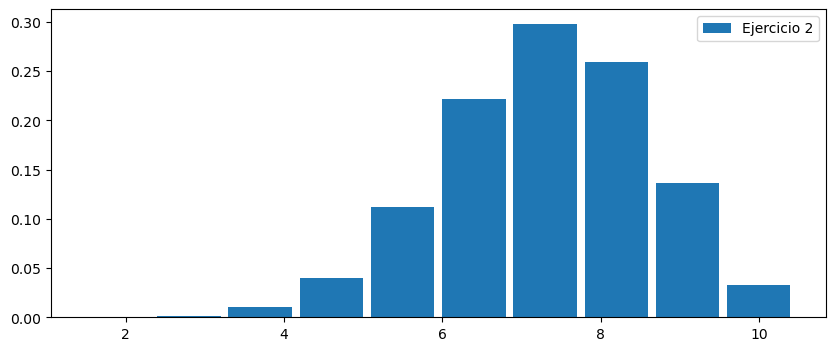

In [8]:
n = 10
p = 0.7
N = 10000

p_acum = P_acum_Binomial_o(n,p)
d_binomial = Gen_distr_discreta(p_acum, np.arange(0, n+1), N)
plot_histogram_discrete(d_binomial, 'Ejercicio 2')

>### <font color ='red'> **Tarea 4: Ejercicio 3** 
Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
>$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
    
> Demuestre matemáticamente que 
> $$P(k+1)=\frac{\lambda}{k+1}P(k)$$
> y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.

Enlace: https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson

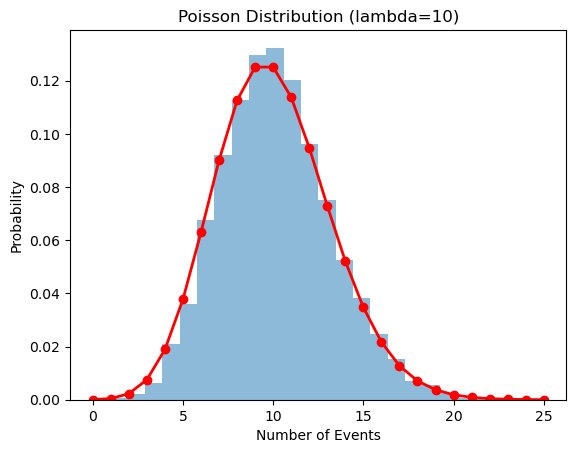

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp, factorial

def poisson(k, lam):
    return (exp(-lam) * (lam**k)) / factorial(k)

# set lambda value
lam = 10

# generate data
data = np.random.poisson(lam, 10000)

# calculate probabilities
probs = [poisson(k, lam) for k in range(max(data) + 1)]

# plot histogram of data
plt.hist(data, bins=max(data) + 1, density=True, alpha=0.5)

# plot Poisson distribution
plt.plot(range(max(data) + 1), probs, 'ro-', linewidth=2)

# set plot labels
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.title(f'Poisson Distribution (lambda={lam})')
plt.show()


>### <font color ='red'> **Tarea 4: Ejercicio 4** 
### Ejemplo binomial: 
La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.

Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que
$$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> ### <font color ='red'>Demostrar la validez de la siguiente ecuación
>$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i \longrightarrow \text{Hablar de las ventajas que sea recursiva}$$

Demostración en latex:
$$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$

$$P(X=i+1)=\frac{n!}{i!(n-i)!}p^i+1(1-p)^{n-(i+1)}$$

$$=\frac{n!}{(n-i-1)!(i+1)!}p^{i+1}(1-p)^{n-i-1}$$

$$=\frac{n!(n-i)}{(n-i)!i!(i+1)!}p^i(1-p)^{n-i}\frac{p}{1-p}$$

$$=(\frac{n-i}{i+1})(\frac{p}{1-p})\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i}$$

$$=(\frac{n-i}{i+1})(\frac{p}{1-p}) \begin{pmatrix}n\\i\end{pmatrix}p^i(1-p)^{n-i}$$

$$=(\frac{n-i}{i+1})(\frac{p}{1-p})p_i $$

## Código de solución estudiante 2

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Ejercicio 1

### $$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x)$$

$$\frac{2}{\pi}\sin^{-1}(\sqrt x)=U$$

$$\sqrt x=\sin(\frac{\pi}{2}U)$$

$$x=\sin^2(\frac{\pi}{2}U)$$

$$f(x)=\frac{1}{\pi\sqrt{x}\sqrt{1-x}}$$

In [11]:
def ejer1acum(N):
    return (np.sin((np.pi/2)*np.random.random(N)))**2

f = lambda x: 1/(np.pi*np.sqrt(x)*np.sqrt(1-x))

/var/folders/sd/h4vwx3xs0555rb9r9gst07fw0000gn/T/ipykernel_40091/267085785.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  f = lambda x: 1/(np.pi*np.sqrt(x)*np.sqrt(1-x))


0.5043291207528068


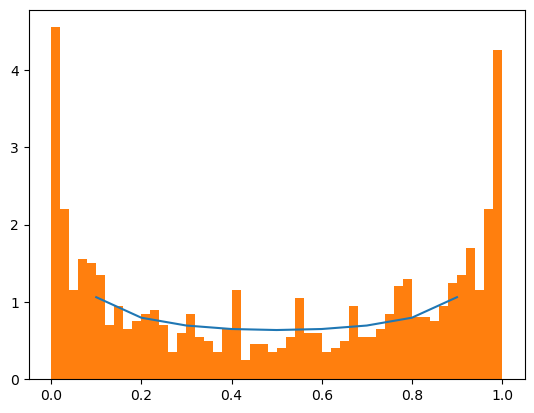

In [12]:
N = 1000
x_tarea = ejer1acum(N)
x = np.arange(0, 1.1, 0.1)
plt.plot(x, [f(n) for n in x])
plt.hist(x_tarea,bins = 50,density=True)
print(np.mean(x_tarea))
plt.show()



/var/folders/sd/h4vwx3xs0555rb9r9gst07fw0000gn/T/ipykernel_40091/267085785.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  f = lambda x: 1/(np.pi*np.sqrt(x)*np.sqrt(1-x))


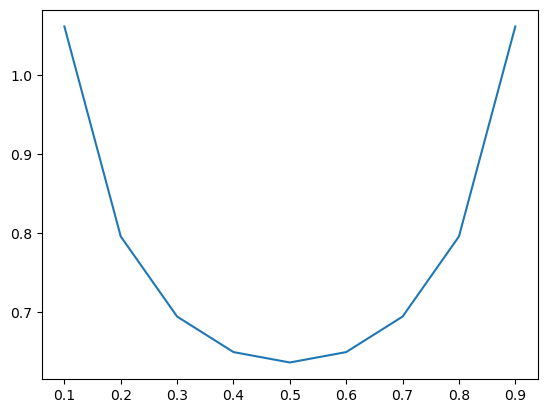

In [13]:
x = np.arange(0, 1.1, 0.1)
plt.plot(x, [f(n) for n in x])

### Ejercicio 2

In [14]:
def Gen_distr_discreta(p_acum: 'P.Acumulada de la distribución a generar',
                       indices: 'valores reales a generar aleatoriamente',
                       N: 'cantidad de números aleatorios a generar'):
    
    U =np.random.rand(N)

    rand2reales = {i: idx for i, idx in enumerate(indices)}

    y = pd.Series([sum([1 for p in p_acum if p < ui]) for ui in U]).map(rand2reales)

    return y

def plot_histogram_discrete(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'=True):
    plt.figure(figsize=[10,4])
    y, x = np.histogram(distribucion, bins=len(set(distribucion)), density=densidad) 
    plt.bar(x[1:], y, label=label)
    plt.legend()
    plt.show()
    

def P_acum_Binomial_o(n,p):
    Pr = np.zeros(n)
    Pr[0] = (1-p)**n
    def pr(i):
        nonlocal Pr
        c  = p/(1-p)
        Pr[i+1]=(c*(n-i)/(i+1))*Pr[i]
        
    [pr(i) for i in range(n-1)]
    return np.cumsum(Pr)

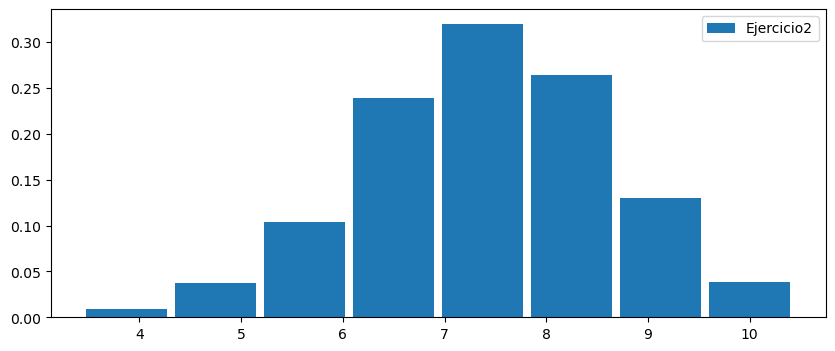

In [15]:
n = 10
p = 0.7
N = 1000

p_acum = P_acum_Binomial_o(n,p)

d_binomial = Gen_distr_discreta(p_acum, np.arange(0, n+1), N)

plot_histogram_discrete(d_binomial, 'Ejercicio2')

### Ejercicio 3

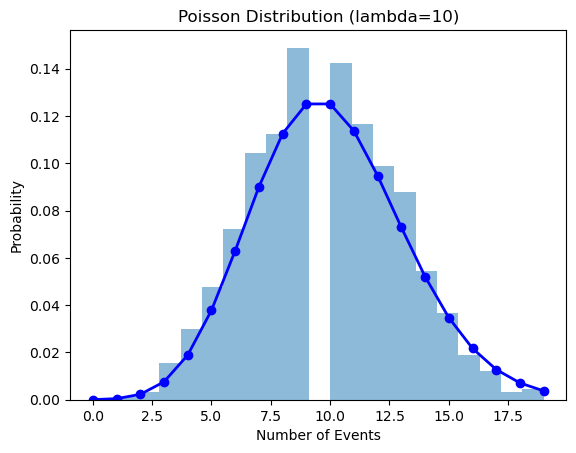

In [16]:
def poisson(k, lam):
    return (np.exp(-lam) * (lam**k)) / factorial(k)

lam = 10

# generate data
data = np.random.poisson(lam, 1000)

# calculate probabilities
probs = [poisson(k, lam) for k in range(max(data) + 1)]

# plot histogram of data
plt.hist(data, bins=max(data) + 1, density=True, alpha=0.5)

# plot Poisson distribution
plt.plot(range(max(data) + 1), probs, 'bo-', linewidth=2)

# set plot labels
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.title(f'Poisson Distribution (lambda={lam})')

# show plot
plt.show()

### Ejercicio 4

$$p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
$$P(X=i+1)=\frac{n!}{i!(n-i)!}p^i+1(1-p)^{n-(i+1)}$$
$$=\frac{n!}{(n-i-1)!(i+1)!}p^{i+1}(1-p)^{n-i-1}$$
$$=\frac{n!(n-i)}{(n-i)!i!(i+1)!}p^i(1-p)^{n-i}\frac{p}{1-p}$$
$$=(\frac{n-i}{i+1})(\frac{p}{1-p})\frac{n!}{i!(n-i)!} p^i(1-p)^{n-i}$$
$$=(\frac{n-i}{i+1})(\frac{p}{1-p}) \begin{pmatrix}n\\i\end{pmatrix}p^i(1-p)^{n-i}$$
$$=(\frac{n-i}{i+1})(\frac{p}{1-p})p_i $$